# Multiple Linear Regression

Multiple Linear Regression (MLR) is an extension of simple linear regression that models the relationship between two or more independent (predictor) variables and a dependent (response) variable by fitting a linear equation to the observed data.
The formula for MLR is:

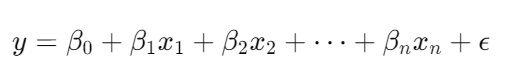


Where:

y - dependent variable.

x1,x2, ...xn - independent variables.

𝛽0 - intercept

𝛽1, 𝛽2 ...𝛽n - coefficients

ϵ  - the error term.

### Usage example:

Marketing Analysis:

**Scenario**: A marketing analyst wants to determine the impact of various digital marketing channels on website traffic.

**Independent Variables**: Spend on social media ads, spend on search engine ads, email campaign frequency, content marketing efforts, etc.
Dependent Variable: Website traffic (number of visitors).

**Usage**: The MLR model can help the analyst understand which marketing channels are most effective in driving traffic and allocate budget accordingly.

#### **About this Dataset**

https://www.kaggle.com/code/sonalisingh1411/multiple-linear-regression-model-on-50-startup

This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

It's a great dataset for evaluating Multiple regression models.

#### **Goal**
To predict whether a particular startup would be safe to invest in or not.

###**Data set description**
Dataset contain 5 columns--"R&D Spend","Administration","Marketing Spend","State","Profit".

1.   **R&D Spend** Research and development – R&D – is the process by which a company works to obtain new knowledge that it might use to create new technology, products, services, or systems that it will either use or sell. So,this column tells you how much you spend on R&D.
2. **Administration** It is the process of arrangements and tasks needed to control the operation of a plan or organization.

3. **Marketing Spend** refers to activities undertaken by a company to promote the buying or selling of a product or service. Marketing includes advertising, selling, and delivering products to consumers or other businesses.

4. **State** This column contain three states which is Califonia,Newyork and Floida.
5. **Profit**
Profit is a financial benefit that is realized when the amount of revenue gained from a business activity exceeds the expenses, costs, and taxes needed to sustain the activity.  







This notebook demonstrates how to use Multiple Linear Regression to predict profit based on multiple features like R&D Spend, Administration, Marketing Spend, and State. The data is preprocessed, including encoding categorical variables, and then split into training and test sets. The model is trained on the training set and tested on the test set, with the results visualized for comparison.

## 1. Importing the libraries

In [1]:
import numpy as np              # numerical operations
import matplotlib.pyplot as plt # plotting graphs
import pandas as pd             # data manipulation and analysis

## 2. Importing the dataset

In [4]:
dataset = pd.read_csv('50_Startups.csv') # Loads the dataset
# Contains all the rows and all columns except the last one 
# (R&D Spend, Administration, Marketing Spend, State - fegatires values
X = dataset.iloc[:, :-1].values
# y: Contains all the rows and only the last column (Profit) - target value
y = dataset.iloc[:, -1].values

In [5]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

## 3. Encoding categorical data
- One-hot encoding avoids creating a misleading ordinal relationship between categories. In the context of the code, this is important because the categorical feature likely represents something like state or region, where no natural order exists.
- One-hot encoding ensures compatibility with a wide range of machine learning algorithms that expect numerical input. Some algorithms, like tree-based methods, can handle categorical data directly, but linear models cannot.

In [6]:
# ColumnTransformer and OneHotEncoder are used to handle categorical data.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Creates a transformer that applies one-hot encoding to the 4th column (index 3) - State and leaves the rest of the columns unchanged.
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# Applies the transformation and converts the result to a NumPy array
X = np.array(ct.fit_transform(X))

In [7]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## 4. Splitting the dataset into the Training set and Test set

In [8]:
# train_test_split is used to split the dataset into training and testing sets.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0):
# Splits the dataset so that 20% is used for testing and 80% for training.
# random_state = 0 ensures reproducibility.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 5. Training the Multiple Linear Regression model on the Training set

In [9]:
# LinearRegression is used to create a linear regression model.
# regressor = LinearRegression(): Creates an instance of the LinearRegression class.
# regressor.fit(X_train, y_train): Trains the model using the training data.

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## 6. Predicting the Test set results

In [10]:
# y_pred = regressor.predict(X_test): Predicts the target values for the test set.
# np.set_printoptions(precision=2): Sets the precision of the NumPy print options to 2 decimal places.
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)):
# Prints the predicted and actual target values side by side for comparison.

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]
